In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data = load_breast_cancer()

In [3]:
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
drop_list1 = ['target']
x_1 = df.drop(drop_list1,axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [5]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [6]:
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.935672514619883


# SVM again but after standardising the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy after standardization: {accuracy}")

SVM Accuracy after standardization: 0.9707602339181286


## 1. Validation Curve

In [14]:
from sklearn.model_selection import validation_curve

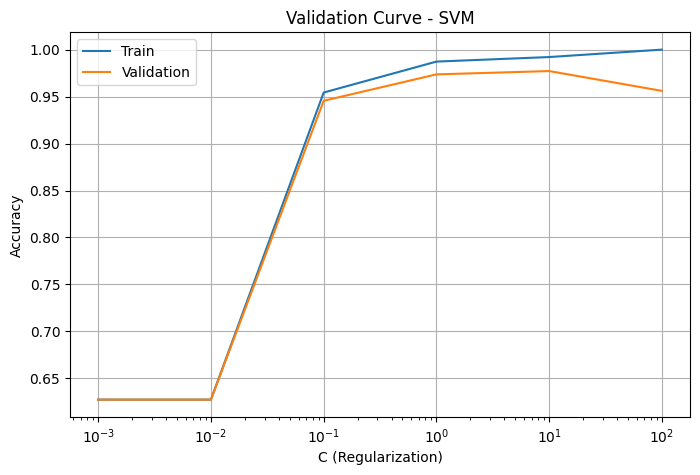

In [15]:
param_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(
    svm.SVC(), X_scaled, y, param_name="C", param_range=param_range,
    scoring="accuracy", cv=5)

plt.figure(figsize=(8, 5))
plt.semilogx(param_range, train_scores.mean(axis=1), label="Train")
plt.semilogx(param_range, test_scores.mean(axis=1), label="Validation")
plt.xlabel("C (Regularization)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - SVM")
plt.legend()
plt.grid()
plt.show()

## 2. Learning Curve

In [16]:
from sklearn.model_selection import learning_curve

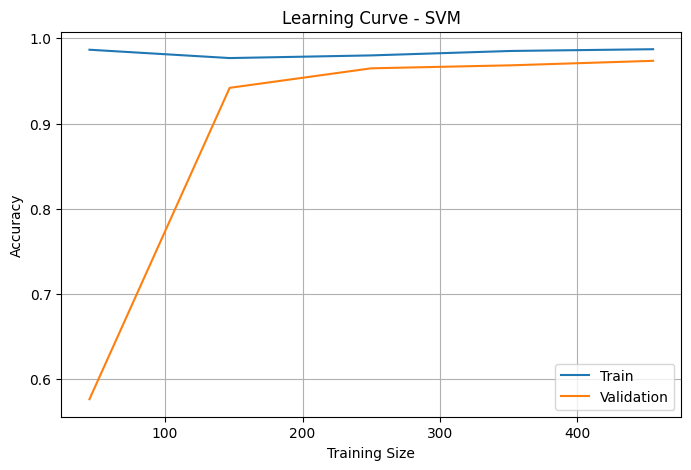

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - SVM")
plt.legend()
plt.grid()
plt.show()

## 3. Confusion Matrix

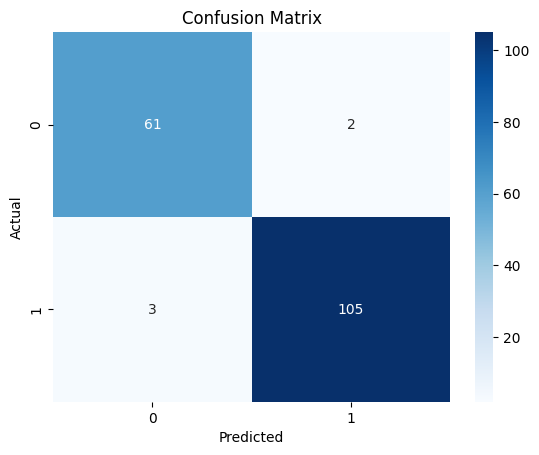

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 4. ROC Curve + 6. AUC

In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
y_proba = model.decision_function(X_test)

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

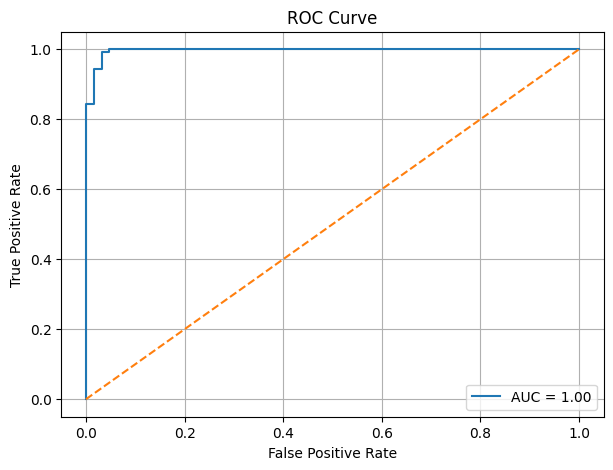

In [22]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## 5. Precision-Recall Curve

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

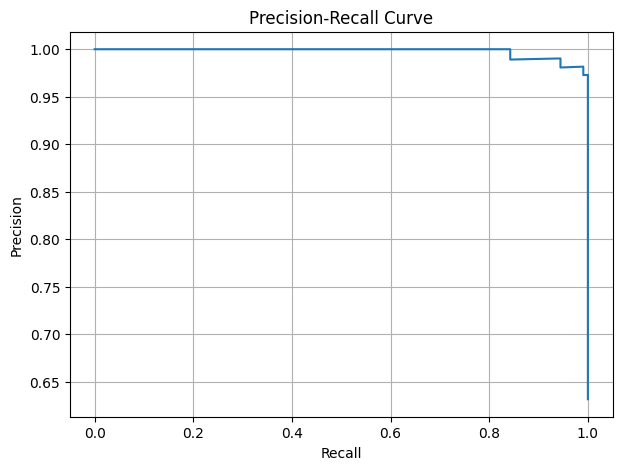

In [25]:
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

## Global Model Agnostic Methods

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

## Partial Dependence + ICE curves

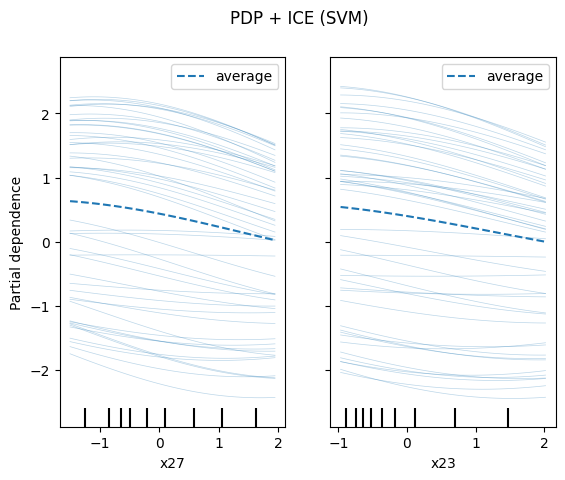

In [27]:
features = [27, 23]

PartialDependenceDisplay.from_estimator(model, X_test, features, kind="both", subsample=50)
plt.suptitle("PDP + ICE (SVM)")
plt.show()

## Permutaion Importance

In [28]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

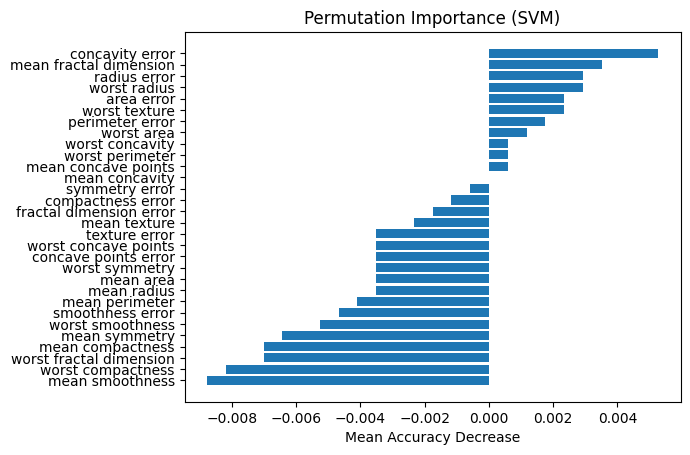

In [29]:
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(x_1.columns)[sorted_idx])
plt.title("Permutation Importance (SVM)")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [30]:
#!pip install alibi lofo-importance

## LOFO

In [31]:
from lofo import LOFOImportance, Dataset, plot_importance

/usr/local/lib/python3.11/dist-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [32]:
df_lofo = pd.DataFrame(X_scaled, columns=x_1.columns)
df_lofo["target"] = y

In [33]:
lofo_dataset = Dataset(df=df_lofo, target="target", features=x_1.columns.tolist())

In [34]:
lofo_imp = LOFOImportance(dataset=lofo_dataset, model=SVC(probability=True), scoring="accuracy", cv=3)

In [35]:
importance_df = lofo_imp.get_importance()

  0%|          | 0/30 [00:00<?, ?it/s]

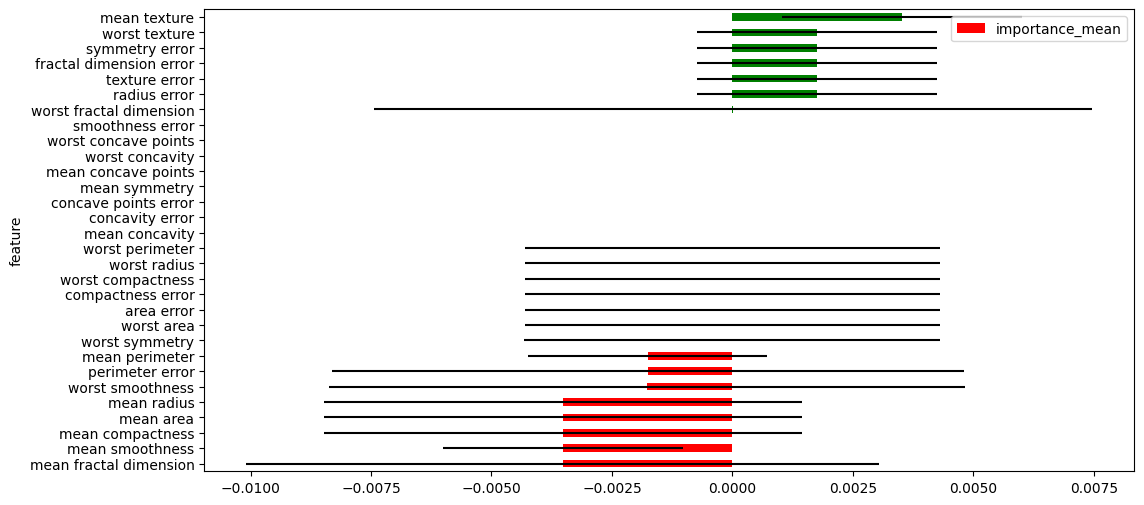

In [36]:
plot_importance(importance_df, figsize=(12, 6))

## LIME

In [37]:
#!pip install lime shap

In [38]:
from lime.lime_tabular import LimeTabularExplainer

In [39]:
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=x_1.columns.tolist(),
    class_names=['0', '1'],
    mode='classification',
    discretize_continuous=True
)

In [40]:
i = 0

In [41]:
model = svm.SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [42]:
y_pred = model.predict(X_test)

In [43]:
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=model.predict_proba
)

In [44]:
exp.show_in_notebook(show_table=True, show_all=False)

In [45]:
exp.save_to_file('lime_explanation.html')

## SHAP

In [46]:
import shap

In [54]:
background_data = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(model.predict_proba, background_data)

In [48]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/171 [00:00<?, ?it/s]

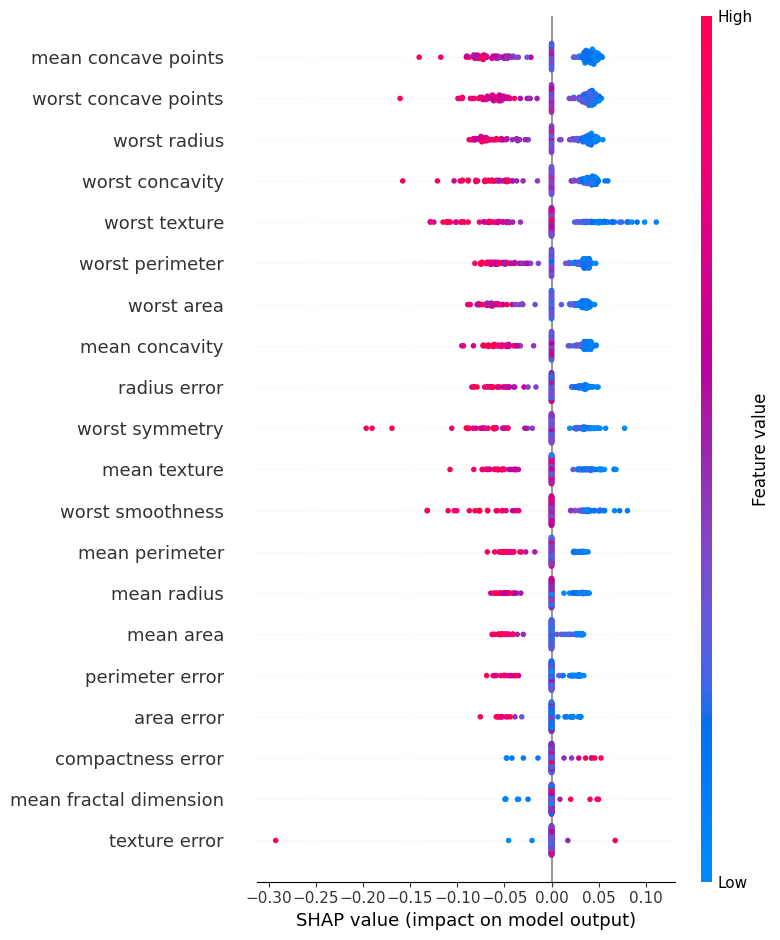

In [61]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, show=True)
plt.show()

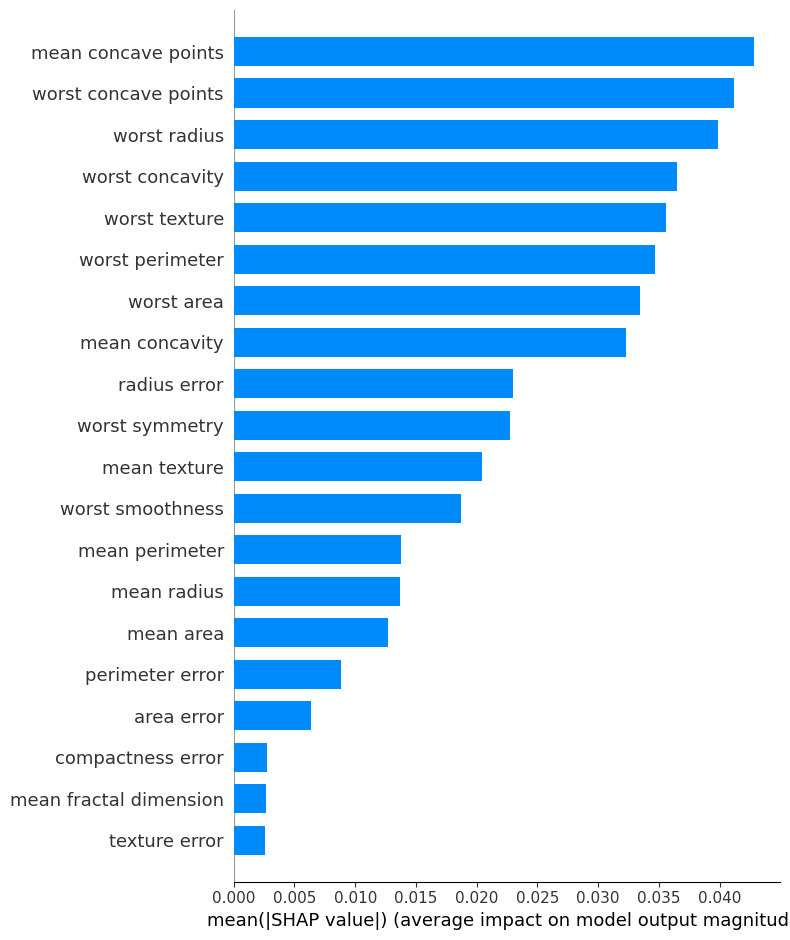

In [62]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, plot_type="bar", show=True)
plt.close()

In [86]:
explanation = shap.Explanation(
    values=shap_values[:, :, 1],
    base_values=explainer.expected_value[1],
    data=X_test,
    feature_names=feature_names
)

In [87]:
num_features = len(feature_names)

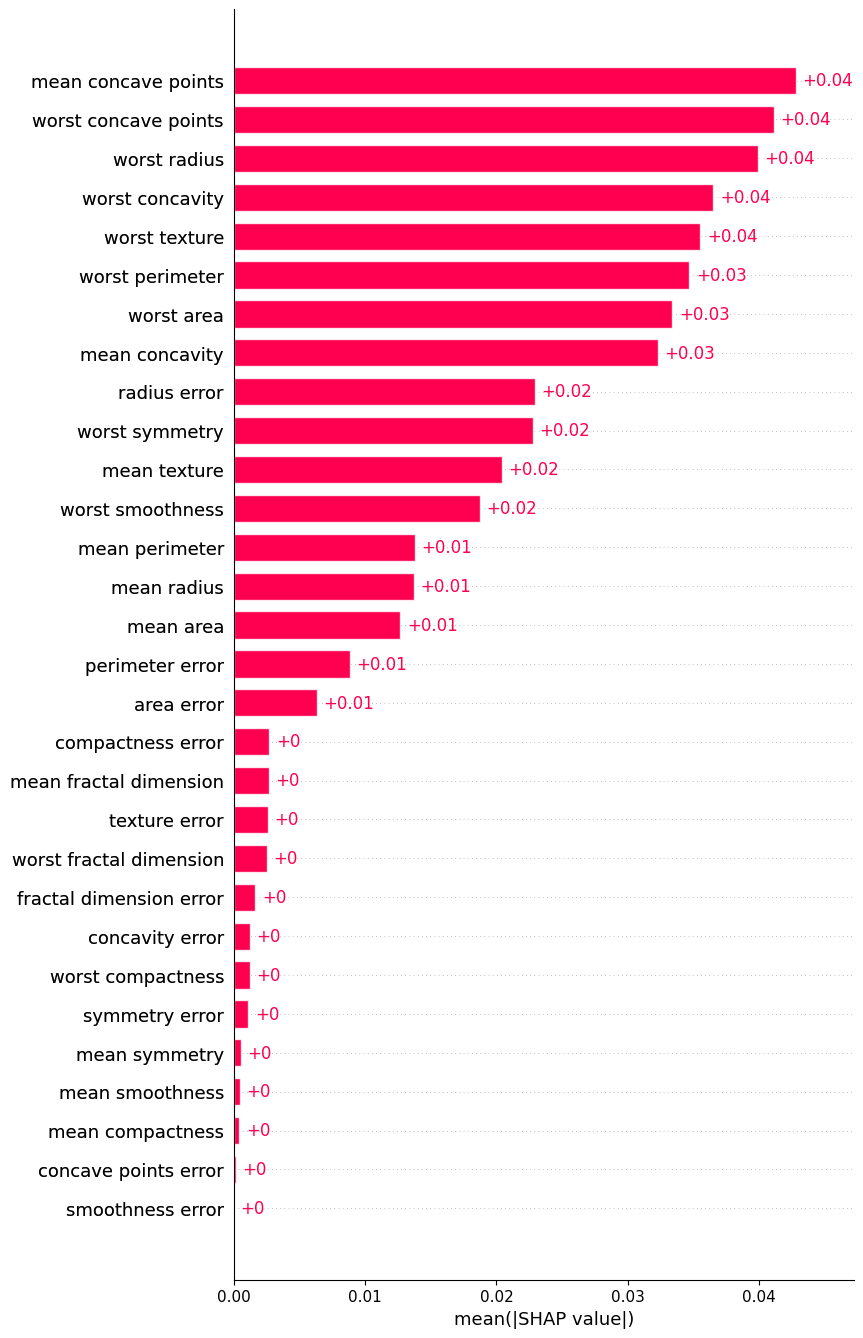

In [88]:
plt.figure()
shap.plots.bar(explanation, max_display=num_features, show=True)
plt.close()

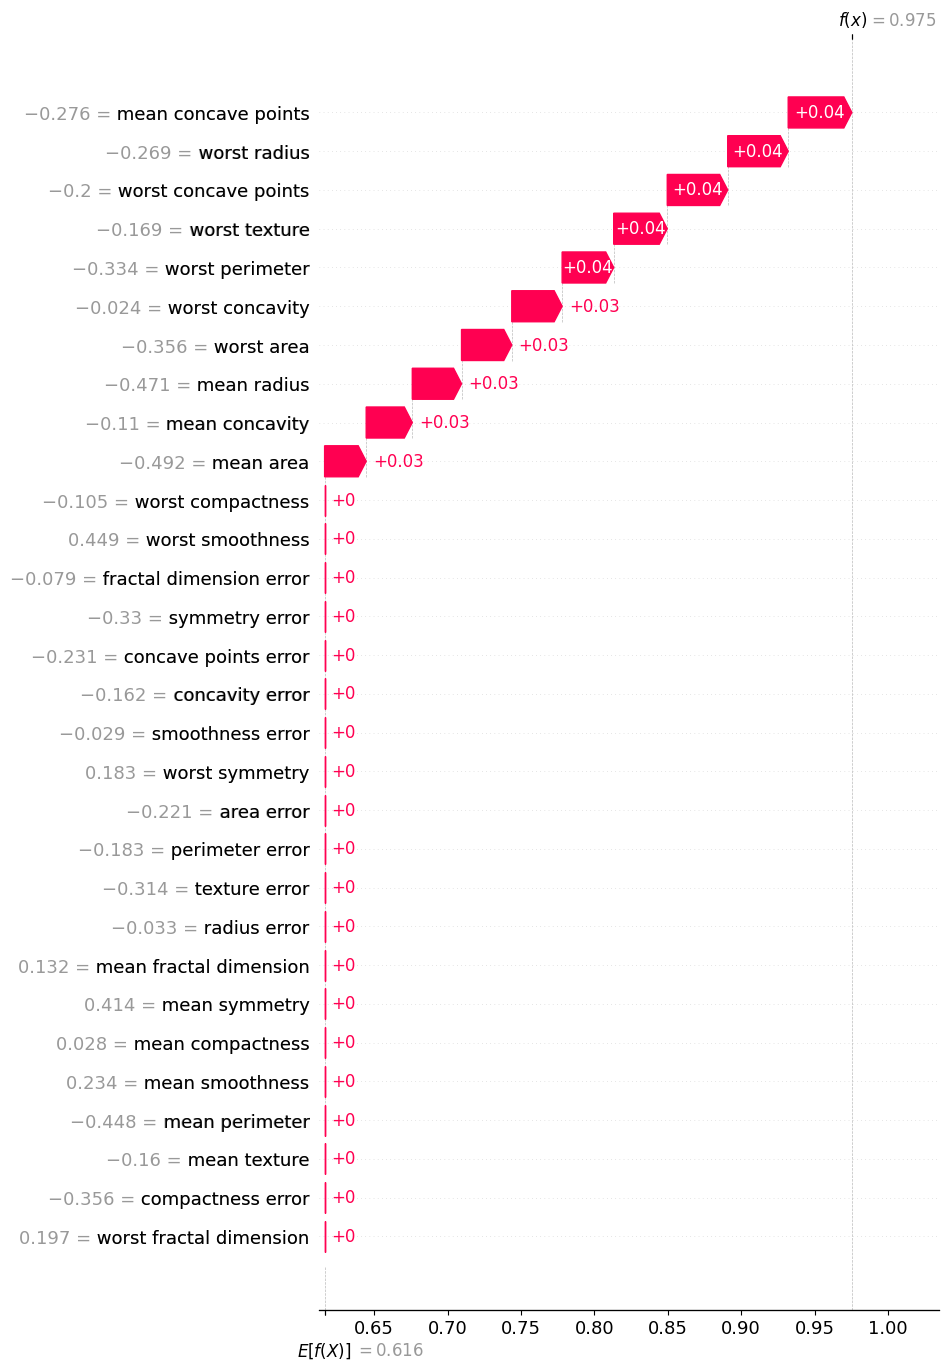

In [94]:
plt.figure()
shap.plots.waterfall(explanation[0], max_display=num_features, show=True)
plt.close()

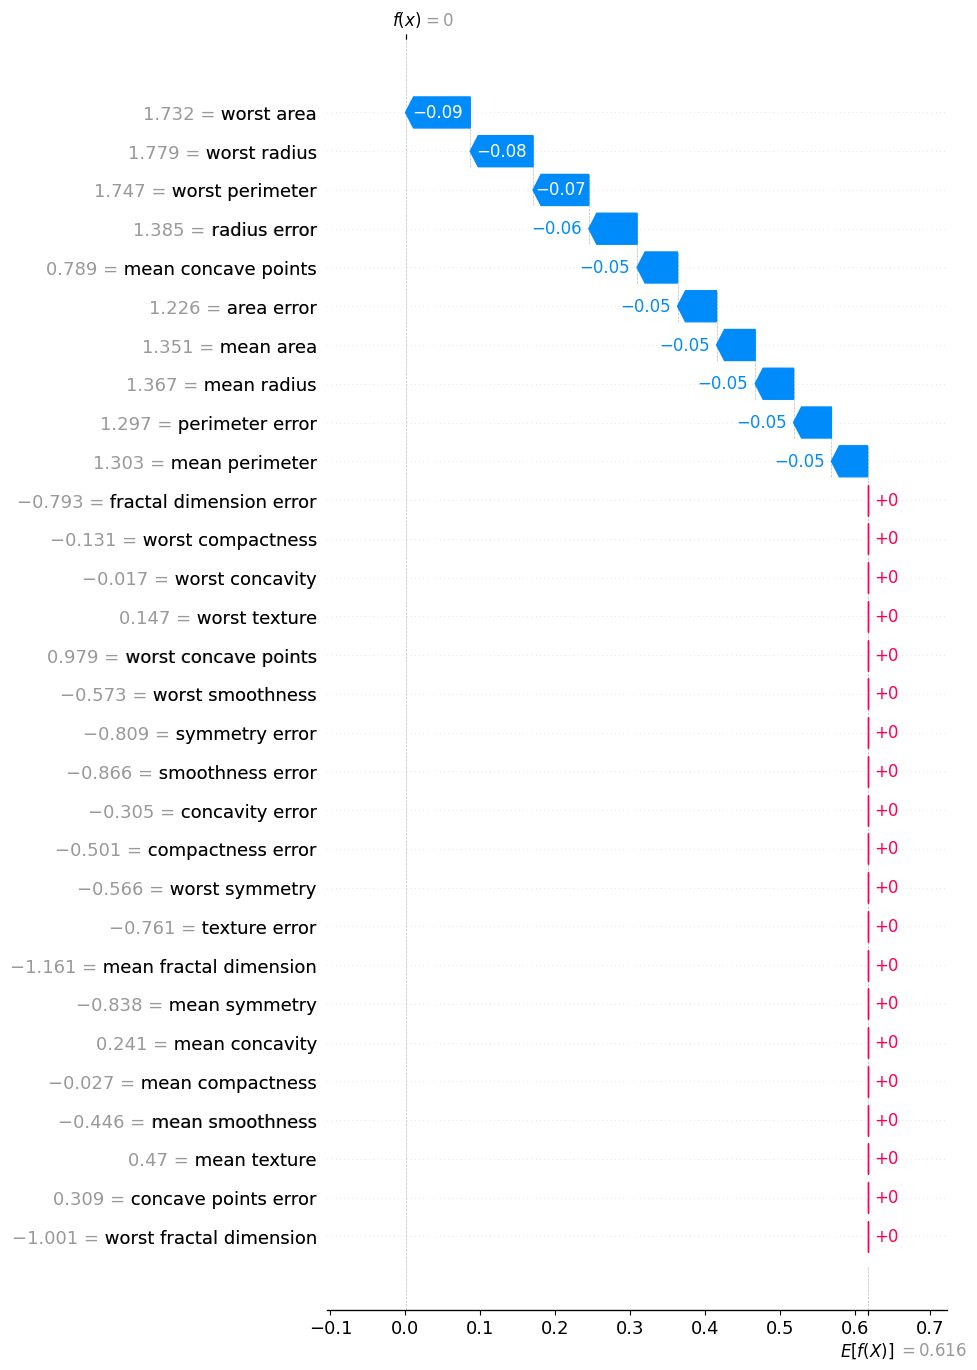

In [101]:
plt.figure()
shap.plots.waterfall(explanation[1], max_display=num_features, show=True)
plt.close()

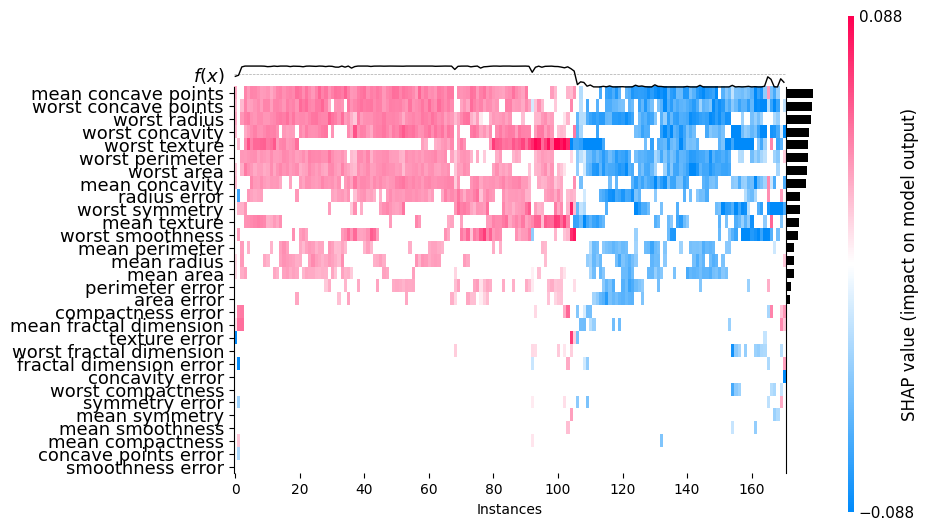

In [95]:
plt.figure()
shap.plots.heatmap(explanation, max_display=num_features, show=True)
plt.close()

```
Abdalla Tamer ✅
```